### ANÁLISIS DE VALIDACIÓN Y OPTIMIZACIÓN DEL AGENTE

- Juan Miguel Dimate
- Andrea Forero
- Juan David Sánchez


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [3]:
from connect4.policy import Policy
from connect4.utils import find_importable_classes
from tournament import play

In [4]:
participants = find_importable_classes("groups", Policy)

players = list(participants.items())

In [5]:
num_games = 50 
seed = 911 

my_agent = "Primera versión"  
opponent = "Group A"          

In [ ]:
def play_multiple_games(agent1_name, agent2_name, n_games, red=True, seedb=911):
    results = []

    agent1  = None
    agent2 = None
    for name, policy in players:
        if name == agent1_name:
            agent1  = (name, policy)
        if name == agent2_name:
            agent2 = (name, policy)

    
    for i in range(n_games):
        if (i + 1) % 10 == 0:
            print(f"   Game {i+1}/{n_games}...")
        
        if red:
            distribucion = 1.0
        else:
            distribucion = 0.0
        
        winner = play(agent1, agent2, best_of=1, 
                     first_player_distribution=distribucion, 
                     seed=seedb + i)
        
       
        winner_name = winner[0]
        
        if winner_name == agent1_name:
            won = 1
        else:
            won = 0
        
        results.append(won)
    
    return results

In [18]:
# Pusimos a jugar al nuestro como rojo
print("Red")

results_red= play_multiple_games(
    my_agent, 
    opponent, 
    num_games, 
    red=True, 
    seedb=seed
)

wins_red = sum(results_red)
print("Wins:", wins_red, "/", num_games)
winrate = (wins_red / num_games) * 100
print("Win rate:", winrate, "%")

Red
   Game 10/50...
   Game 20/50...
   Game 30/50...
   Game 40/50...
   Game 50/50...
Wins: 48 / 50
Win rate: 96.0 %


In [19]:
# Pusimos a jugar al nuestro como amarillo

print("Yellow")

results_yellow = play_multiple_games(
    my_agent, 
    opponent, 
    num_games, 
    red=False, 
    seedb=seed + 1000
)

wins_yellow = sum(results_yellow)
print("Wins:", wins_yellow, "/", num_games)
winrate = (wins_yellow / num_games) * 100
print("Win rate:", winrate, "%")

Yellow
   Game 10/50...
   Game 20/50...
   Game 30/50...
   Game 40/50...
   Game 50/50...
Wins: 46 / 50
Win rate: 92.0 %


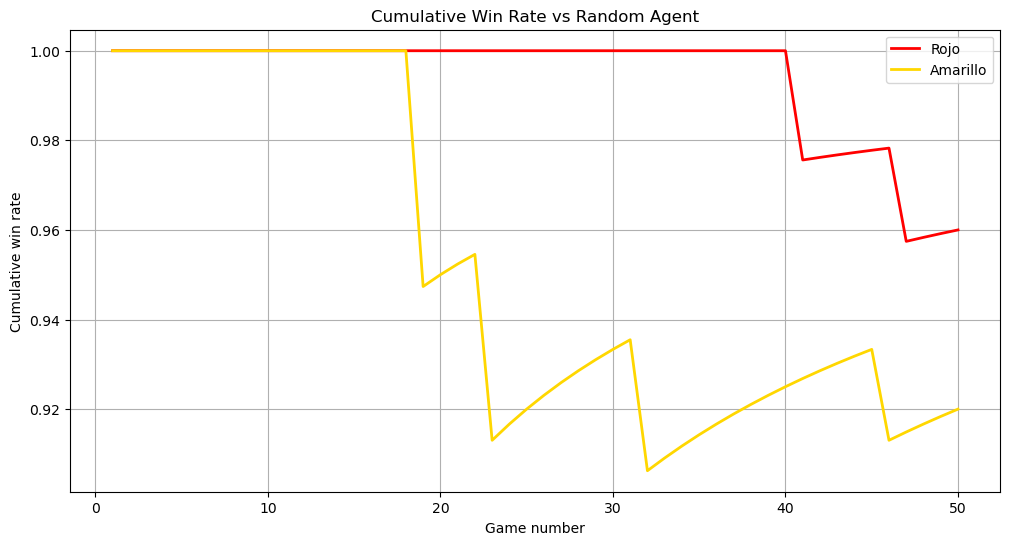

In [20]:
winrate_acum_rojo = []
winrate_acum_amarillo = []

# Para rojo
for i in range(len(results_red)):
    victorias = 0
    for j in range(i+1):
        if results_red[j] == 1:
            victorias = victorias + 1
    
    wr = victorias / (i+1)
    winrate_acum_rojo.append(wr)

# Para amarillo
for i in range(len(results_yellow)):
    victorias = 0
    for j in range(i+1):
        if results_yellow[j] == 1:
            victorias = victorias + 1
    
    wr = victorias / (i+1)
    winrate_acum_amarillo.append(wr)


plt.figure(figsize=(12, 6))

x_axis = []
for i in range(1, num_games+1):
    x_axis.append(i)

plt.plot(x_axis, winrate_acum_rojo, label='Rojo', color='red', linewidth=2)
plt.plot(x_axis, winrate_acum_amarillo, label='Amarillo', color='gold', linewidth=2)


plt.xlabel('Game number')
plt.ylabel('Cumulative win rate')
plt.title('Cumulative Win Rate vs Random Agent')
plt.legend()
plt.grid(True)

plt.show()
